In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [75]:
def readData(filename):
    df = pd.read_csv(filename)
    return df.values

x = readData('./MarksRegression/Training Data/Linear_X_Train.csv')
y = readData('./MarksRegression/Training Data/Linear_Y_Train.csv')
print(x)

print(x.shape)
print(y.shape)

[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]
(3750, 1)
(3750, 1)


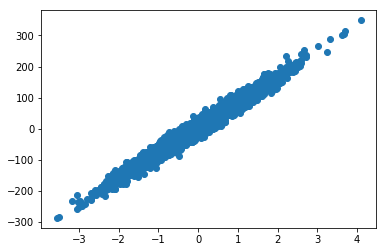

In [9]:
plt.scatter(x,y)
plt.show()

## Normalising

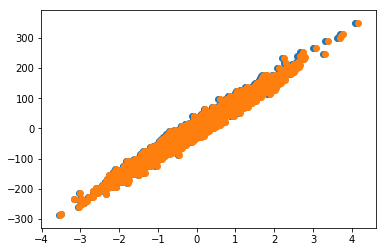

In [10]:
X = (x - x.mean())/x.std();
Y = y
plt.scatter(x,y)
plt.scatter(X,Y)

## Gradient Descent 

In [59]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x
    # x is some scaler
    # theta of form [0 1]

def error(X,Y,theta):
    
    m = X.shape[0] #total no of samples
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx - y[i])**2 
        
    return error

def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += hx - Y[i]
        grad[1] += (hx - Y[i])*X[i]
        
    return grad

# Main ALGO
def gradientDescent(X,Y,learning_rate=0.0001):
    
    theta = np.zeros((2,))
    itr = 0
    max_itr = 100
    
    error_list = []
    
    while itr<max_itr :
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr += 1
        
    return theta,error_list



In [60]:
final_theta,error_list = gradientDescent(X,Y)

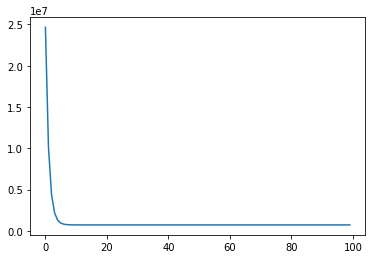

In [61]:
plt.plot(error_list)

In [62]:
print(final_theta)

[ 0.68386897 79.90573694]


In [63]:
xtest = readData('./MarksRegression/Test Cases/Linear_X_Test.csv')

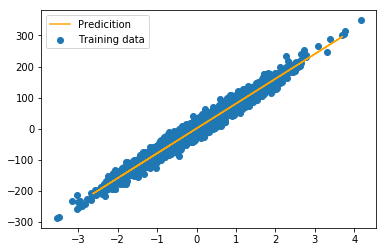

In [64]:
plt.scatter(X,Y,label = 'Training data')
plt.plot(xtest,hypothesis(xtest,final_theta),c="orange",label = 'Predicition') 
# xtest = x plot, hypothesis(xtest,final_theta) = y plot
plt.legend()
plt.show()

In [65]:
result_y = hypothesis(xtest,final_theta)

In [66]:
print(result_y)

[[-149.37466337]
 [ -68.7567667 ]
 [-201.49222227]
 ...
 [  10.91242825]
 [ -21.53292954]
 [ -53.68602633]]


In [77]:
dataset = pd.DataFrame({'y': result_y[:, 0]})
# result_y.to_csv('./MarksRegression/Test Cases/sample_submission_linear.csv')
print(dataset.values)

[[-149.37466337]
 [ -68.7567667 ]
 [-201.49222227]
 ...
 [  10.91242825]
 [ -21.53292954]
 [ -53.68602633]]


In [78]:
dataset.to_csv('./MarksRegression/Test Cases/sample_submission_linear.csv')